In [1]:
# Imports
import torch
from torch.distributions.mixture_same_family import MixtureSameFamily
import torch.distributions as D
import pickle
import numpy as np

In [2]:
# Plot style
from make_cmaps import make_cmap
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

%matplotlib inline
%config InlineBackend.figure_format='retina'

plt.style.reload_library()
plt.style.use('thesis_style')

#     'dark_blue': "#10277C",
#     'lilac': '#BAB7ED',

c_dict = {
    'steal_blue': '#356FB2',
    'bright_blue': '#55B9F9',
    'pink': '#F3B5E0',
    'orange': '#EE6A2C',
    'red': '#C53827'
}

cmap = make_cmap(list(c_dict.values()), n_colors=1000)

In [15]:
# Mixture of Gaussians

# y, x
mus = torch.FloatTensor([[2.0, 3.0], [3.0, 1.5], [3.8, 4.0], [7.0, 7.0]])
sigmas = torch.FloatTensor([[0.7, 0.7], [0.7, 0.7], [0.7, 0.7], [0.6, 0.6]])

# Mixture of Gauassians (mixture is equal)
mix = D.Categorical(torch.ones(4,))
comp = D.Independent(D.Normal(mus, sigmas), 1)
gmm = MixtureSameFamily(mix, comp)

# Density plot values
xx, yy = torch.meshgrid(torch.arange(0, 9, 0.1), torch.arange(0, 9, 0.1))
pos = torch.stack([xx.flatten(), yy.flatten()], dim=1)
prob = gmm.log_prob(pos).exp().reshape(xx.shape)

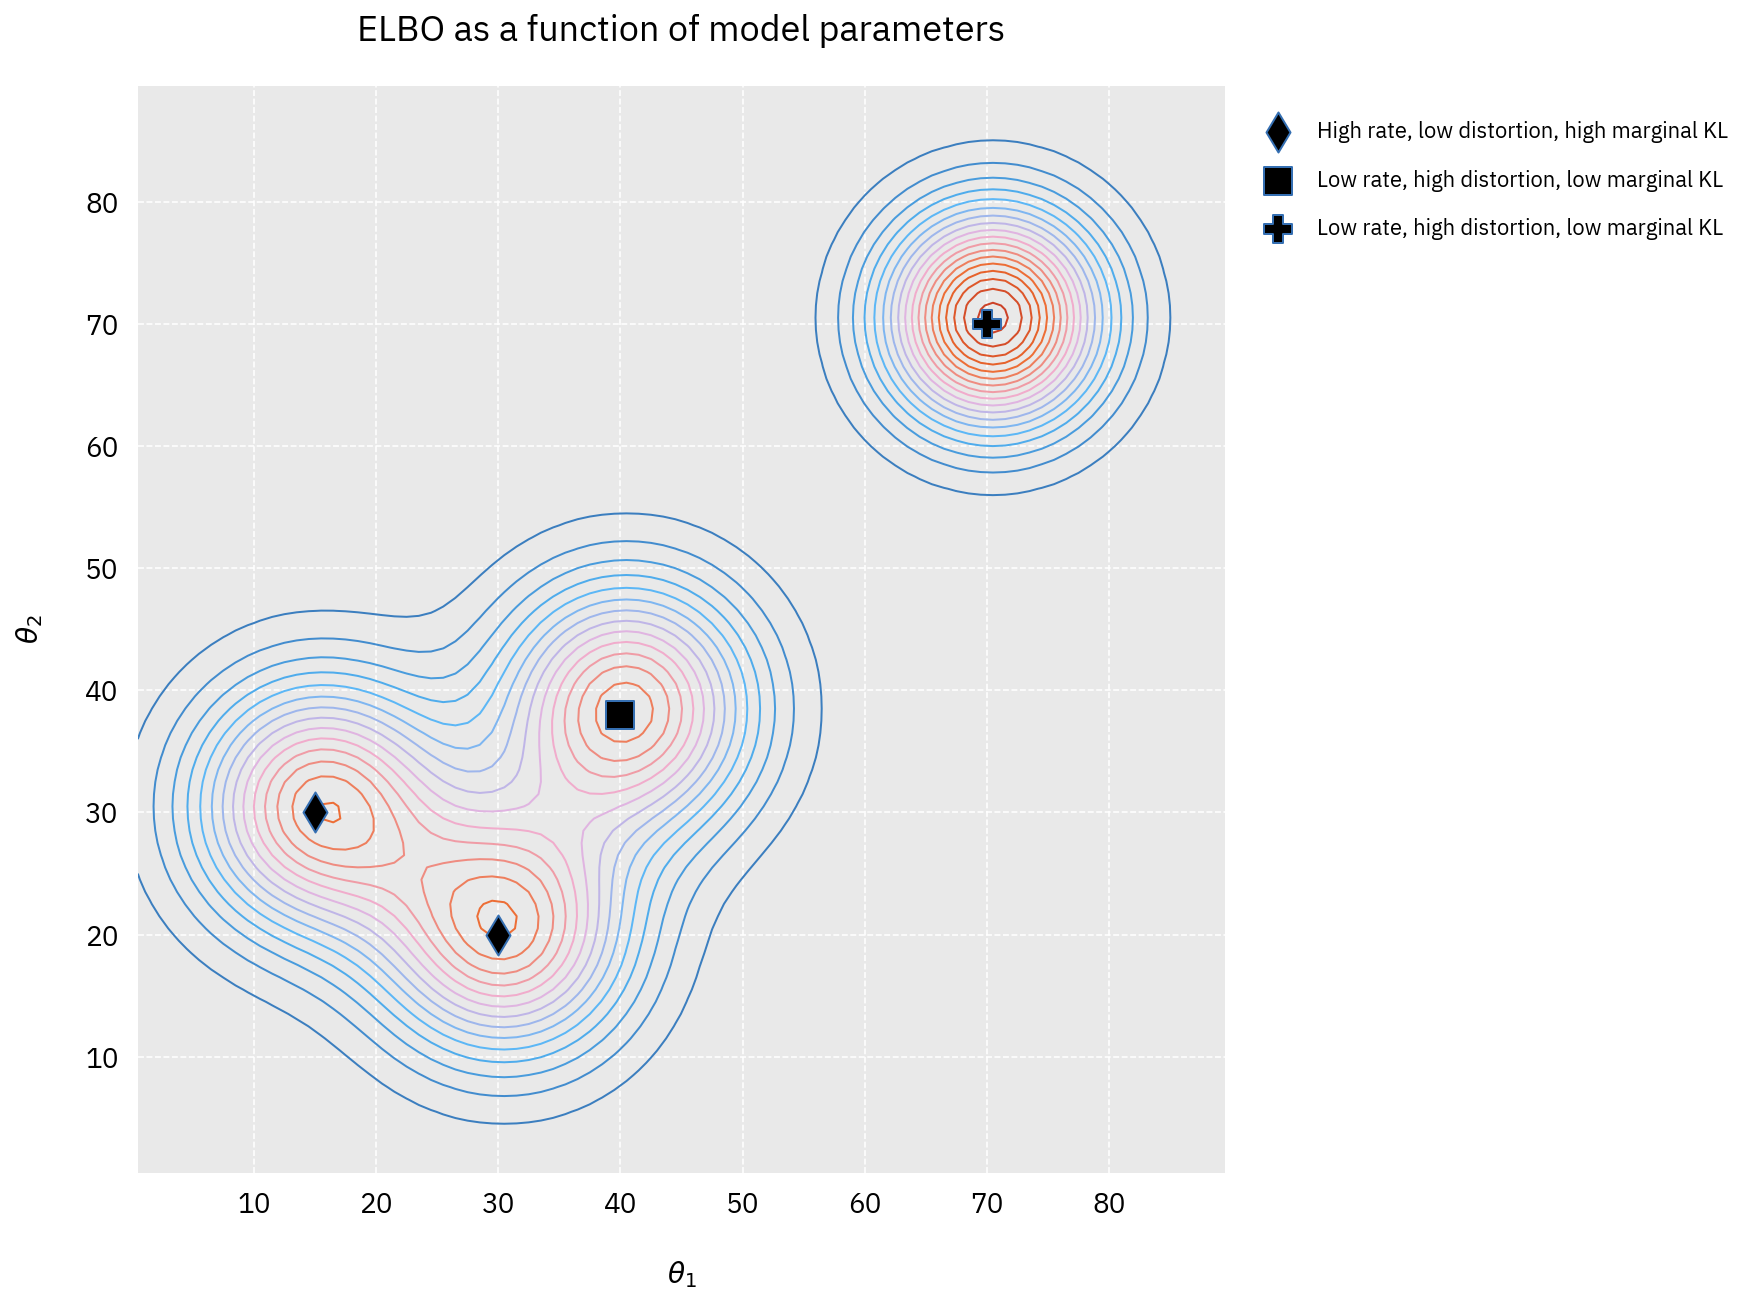

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))

# ax = axs[0]
# ax.imshow(prob.numpy(), origin='lower', cmap=cmap, alpha=0.3)
ax.contour(prob.numpy(), 20, origin='lower', cmap=cmap, linewidths=1)
ax.set_aspect('equal')

ms = 200

marker_colour = "black"
# marker_colour = "#10277C"

# x , y
ax.scatter([3.0*10], [2.0*10], color=marker_colour, marker='d', s=ms, linewidths=1.0, edgecolors=c_dict["steal_blue"], 
           zorder=100, label='High rate, low distortion, high marginal KL')
# ax.scatter([3.0*10], [2.0*10], color='white', marker='d', s=ms+200, linewidths=1.0, alpha=0.5, zorder=99)
ax.scatter([1.5*10], [3.0*10], color=marker_colour, marker='d', s=ms, linewidths=1.0, edgecolors=c_dict["steal_blue"], 
           zorder=100) #label="High rate, low distortion, high marginal KL"
# ax.scatter([1.5*10], [3.0*10], color='white', marker='d', s=ms+200, linewidths=1.0, alpha=0.5, zorder=99)
ax.scatter([4.0*10], [3.8*10], color=marker_colour, marker='s', s=ms, linewidths=1.0, edgecolors=c_dict["steal_blue"], 
           zorder=100, label="Low rate, high distortion, low marginal KL")
# ax.scatter([4.0*10], [3.8*10], color='white', marker='s', s=ms+200, linewidths=1.0, alpha=0.5, zorder=99)
ax.scatter([7.0*10], [7.0*10],  color=marker_colour, marker='P', s=ms, linewidths=1.0, edgecolors=c_dict["steal_blue"], 
           zorder=100, label="Low rate, high distortion, low marginal KL")
# ax.scatter([7.0*10], [7.0*10], color='white', marker='P', s=ms+200, linewidths=1.0, alpha=0.5, zorder=99)

ax.set_xlabel(r"$\theta_1$")
ax.set_ylabel(r"$\theta_2$")
ax.legend(loc=(1.02, 0.85), fontsize=11, labelspacing=1.2)
ax.set_title("ELBO as a function of model parameters", size=18, y=1.03)
ax.set_facecolor("#E9E9E9")
ax.set_alpha(1.0)

# Change the ticks
# ticks_locs = np.arange(0, 80, 10)
# ax.set_xticks(ticks_locs)
# x_labels = torch.arange(-1, 7, 0.1)[ticks_locs].numpy()
# ax.set_xticklabels([f"{i:.2f}" for i in x_labels])

plt.savefig("plots/bad-vi-drawing.png", dpi=300, bbox_inches='tight')
plt.savefig("plots/bad-vi-drawing.svg", dpi=300, bbox_inches='tight')

None